In [98]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from pylab import mpl
import brewer2mpl
#调颜色
bmap = brewer2mpl.get_map('PuBu', 'Sequential', 9)

colors = bmap.mpl_colors


In [99]:
# !pip install brewer2mpl

In [95]:
import matplotlib
matplotlib.matplotlib_fname()
from matplotlib.font_manager import FontManager
fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [68]:
# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [69]:
# # matplotlib缓存的目录
# import matplotlib
# print(matplotlib.get_cachedir())

In [96]:
df_p= pd.read_excel(os.path.join(os.getcwd(),'../data/cleaneddata/cleaned_car_all.xlsx'),sheet_name='petrol')
df_e =pd.read_excel(os.path.join(os.getcwd(),'../data/cleaneddata/cleaned_car_all.xlsx'),sheet_name='electric')
df_m =pd.read_excel(os.path.join(os.getcwd(),'../data/cleaneddata/cleaned_car_all.xlsx'),sheet_name='mixed')
df_e.head(10)

Unnamed: 0                                 title  price  price_new  \
0           0               零跑汽车 零跑T03 2021款 400豪华版   7.19       7.58   
1           1          威马汽车 威马W6 2021款 520km PRO全能版  15.60      20.98   
2           2          奇瑞 小蚂蚁 2021款 15万蚁粉款 蚁炫版 磷酸铁锂   5.30       7.38   
3           3            特斯拉 Model Y 2022款 长续航全轮驱动版  35.45      37.59   
4           4            零跑汽车 零跑T03 2021款 400豪华Pro版   7.88       7.68   
5           5       特斯拉 Model 3 2021款 标准续航后驱升级版 3D6  21.60      25.17   
6           6  长安 奔奔E-Star 2020款 心悦版 磷酸铁锂（31.18kWh）   6.95       7.48   
7           7             奇瑞eQ1 2018款 小蚂蚁400 智享版 4座   4.57       6.58   
8           8           特斯拉 Model 3 2019款 标准续航后驱升级版  17.78      29.18   
9           9             特斯拉 Model Y 2021款 标准续航后驱版  26.55      29.18   

   date_regi  mileage  official_endurance standard  gearbox  num_trans  ...  \
0 2021-05-01     1.50               403.0      新能源        1          0  ...   
1 2022-11-01     0.01               520.0      新能源        1          0  ...   
2 2020-11-01     4.60               301.0      新能源        1          1  ...   
3 2022-06-01     0.08               640.0      新能源        1          1  ...   
4 2022-03-01     0.60               403.0      新能源        1          1  ...   
5 2021-06-01     2.00               468.0      新能源        1          0  ...   
6 2022-06-01     0.01               301.0      新能源        1          0  ...   
7 2018-12-01     4.30               301.0      新能源        1          2  ...   
8 2020-01-01     8.50               460.0      新能源        1          1  ...   
9 2021-12-01     1.70               525.0      新能源        1          1  ...   

   battery_type  energy_type  keys  brand city  price_log  rate_residual  \
0             -            1     2   零跑汽车    1   2.149434       0.948549   
1         三元锂电池            1     2   威马汽车    1   3.090133       0.743565   
2             -            1     2     奇瑞    1   2.125848       0.718157   
3         三元锂电池            1     1    特斯拉    1   3.652993       0.943070   
4             -            1     2   零跑汽车    1   2.161022       1.026042   
5             -            1     1    特斯拉    1   3.264614       0.858164   
6             -            1     2     长安    1   2.137710       0.929144   
7         锂离子电池            1     1     奇瑞    1   2.025513       0.694529   
8         三元锂电池            1     1    特斯拉    1   3.407179       0.609321   
9             -            1     1    特斯拉    1   3.407179       0.909870   

  num_day  newness_rate  mile_per_day  
0     556      0.898447      0.002698  
1       7      0.998721      0.001429  
2     737      0.865388      0.006242  
3     160      0.970776      0.000500  
4     252      0.953973      0.002381  
5     525      0.904110      0.003810  
6     160      0.970776      0.000063  
7    1438      0.737352      0.002990  
8    1042      0.809680      0.008157  
9     342      0.937534      0.004971  

[10 rows x 24 columns]

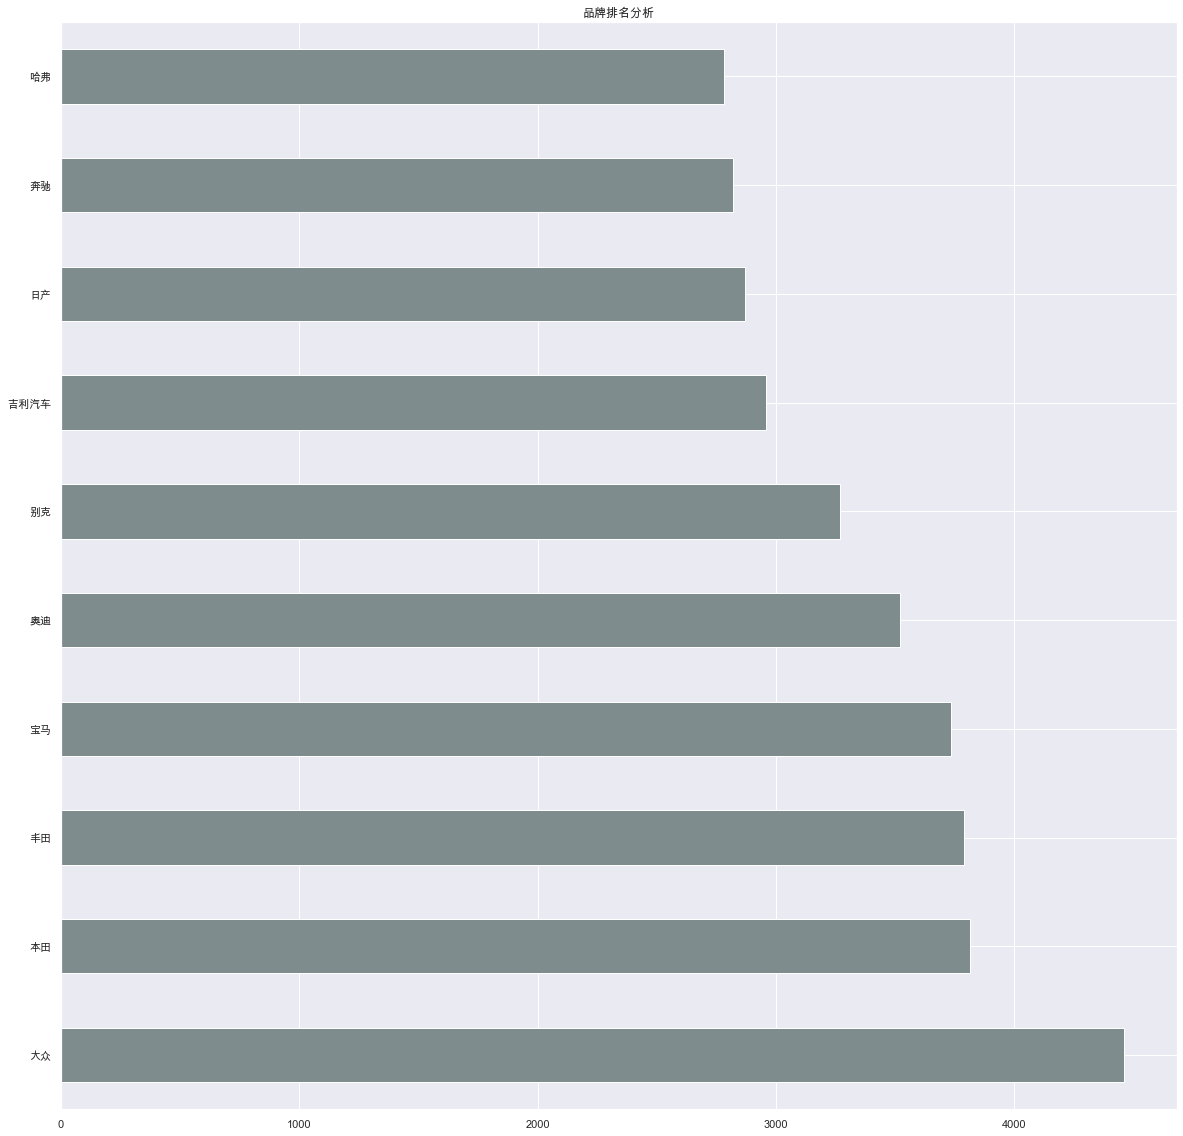

In [97]:
# 品牌分析 排名前10
df_p.brand.value_counts()[:10].plot.barh(title='品牌排名分析',color='#7f8c8d')
df_e.brand.value_counts()[:10].plot.barh(title='品牌排名分析',color='#7f8c8d')
df_m.brand.value_counts()[:10].plot.barh(title='品牌排名分析',color='#7f8c8d')
plt.show()

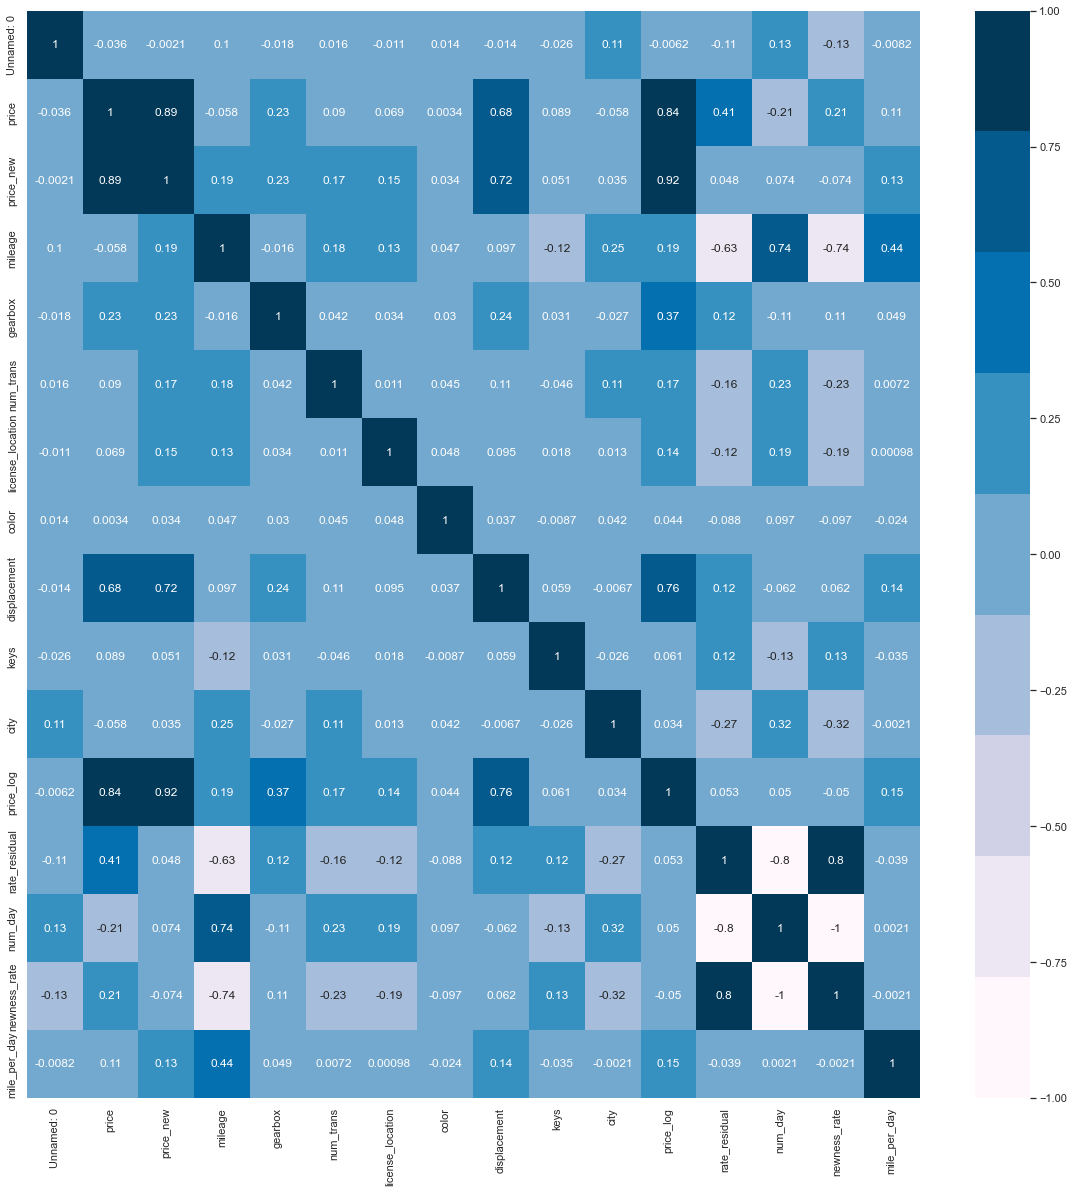

In [92]:
def show_corr(clean_data_set):
    corr_data_matrix = clean_data_set.corr()
    corr_data_matrix['rate_residual'].sort_values(ascending=False)
    #查看哪些字段与汽油车保值率最相关，我们先计算相关性矩阵
    df_tep1=clean_data_set.drop(columns='energy_type')
    sns.set(rc={"figure.figsize":(20, 20)})
    sns.heatmap(df_tep1.corr(), annot = True,cmap=colors)

show_corr(df_p)

对于汽油车，我们所构造的二手车保值率特征与二手车成新率表现出了极大的相关性（0.8），与排量和变速箱只有一点相关性（0.12），与使用天数呈极大的负相关（-0.8），其次与里程数呈极大的负相关（-0.63），与城市呈一定的负相关（-0.27）。


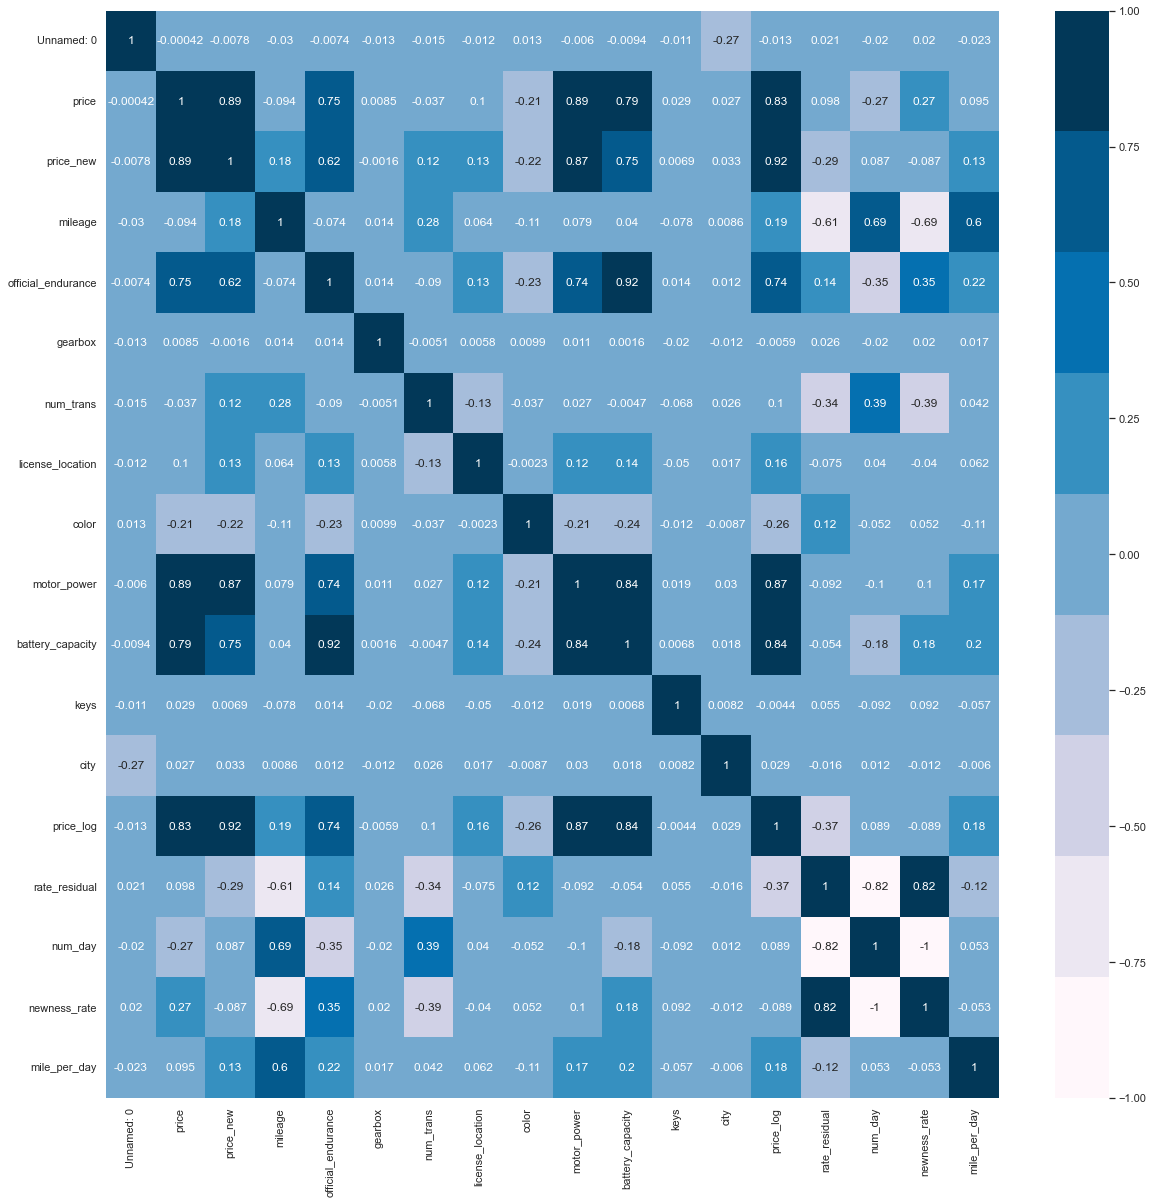

In [73]:
show_corr(df_e)

对于电车，首先我们可以发现二手车保值率与成新率有极大的相关性（0.82），其次是official endurance（0.14），与color有一些相关性（0.12），可以注意到二手车售价与使用天数是负相关（-0.82），其次是与里程数负相关性（-0.61）

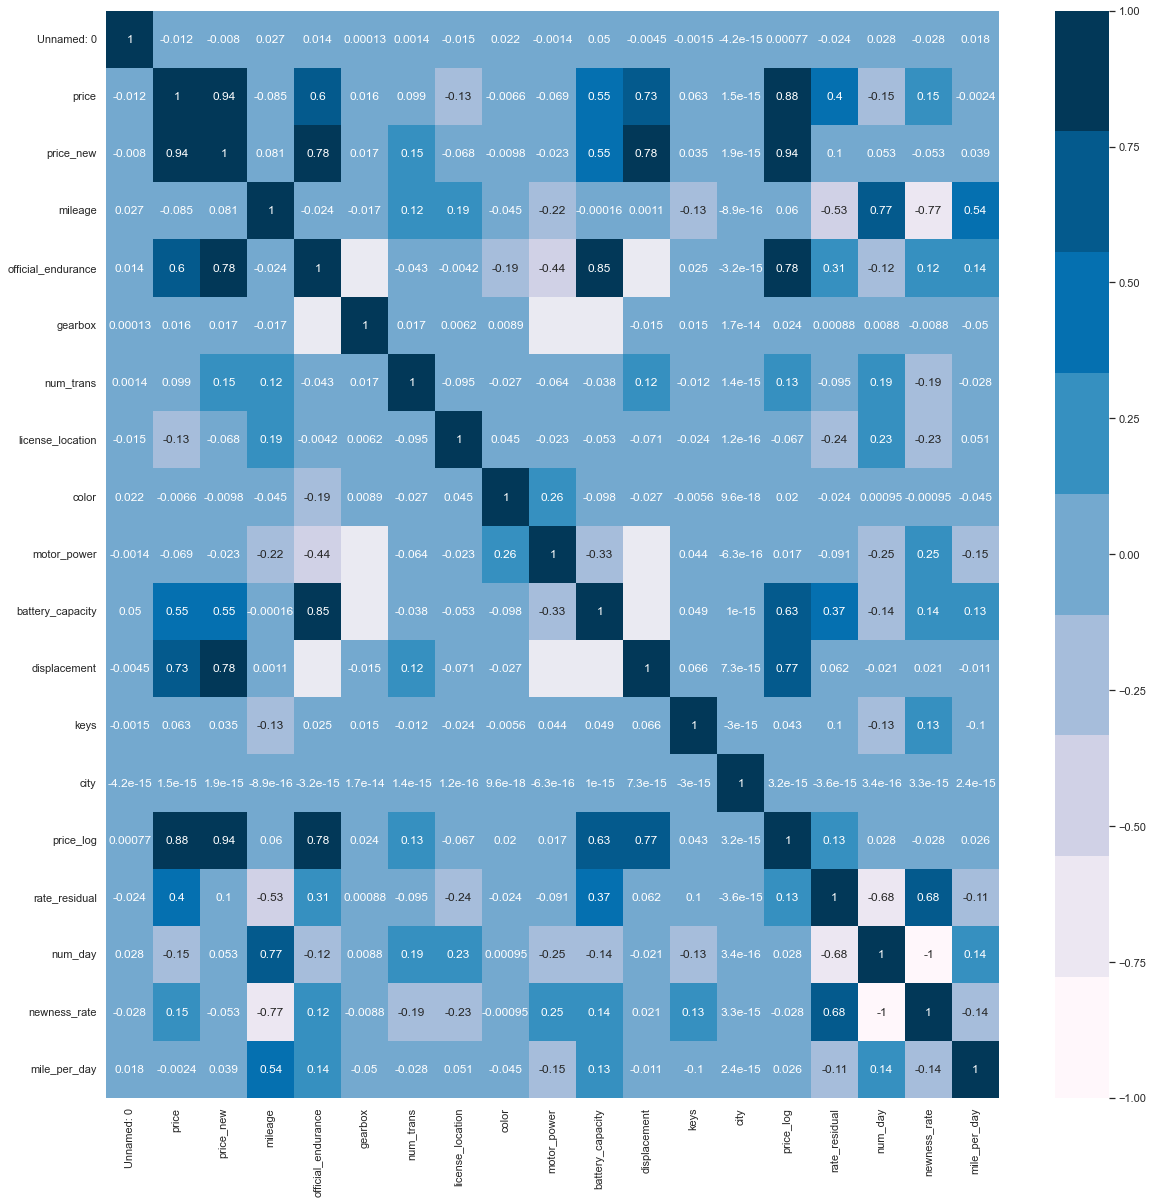

In [74]:
show_corr(df_m)

对于混合车，首先我们可以发现二手车保值率与成新率有极大的相关性（0.68），其次是battery_capacity（0.37），与official_endurance有一些相关性（0.31），可以注意到二手车售价与使用天数是负相关（-0.68），其次是与里程数负相关性（-0.53)。

总结：三种车型保值率都与成新率有极大的相关性，其次与车辆的动力功率也有一定的相关性（油车为排量，电车为battery_capacity，
official_endurance）三个车型都与使用天数呈极大的负相关，其次与里程数呈较大的负相关。


In [75]:
numeric_features_p = ['price','price_new','mileage','displacement','price_log','rate_residual','num_day','newness_rate','mile_per_day']

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users

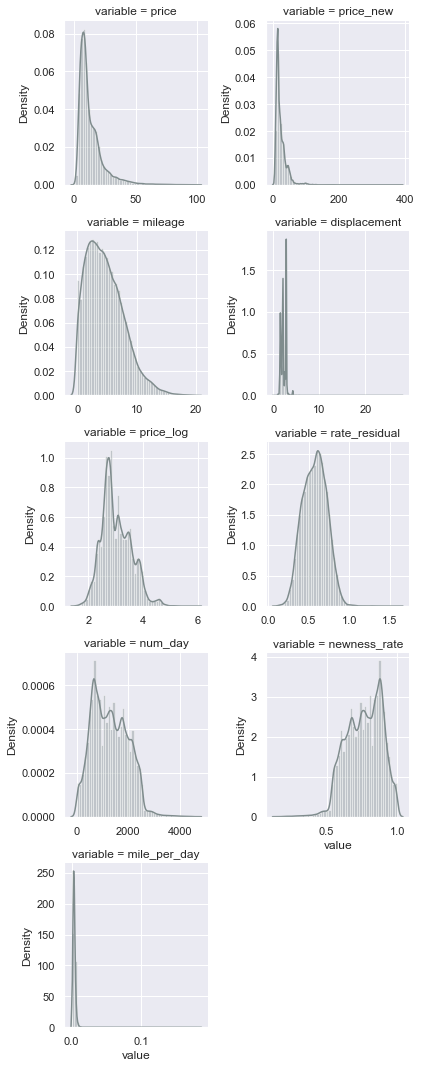

In [76]:
### 3) 每个数字特征得分布可视化
#汽车
f = pd.melt(df_p, value_vars=numeric_features_p)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value",color='#7f8c8d')

可以看出price主要分布在10w，意味着二手车市场上主要流通10w左右的二手车，price_new主要分布在20w左右，所有20w原价的车更受二手市场的亲赖，price_new其分布非常广，400w的二手车也活跃在市场上。与此同时小于5w里程出售的二手车比较多，绝大部分二手车在10w里程以内。另外，一些二手车的displacement排量差距很大，但市场中主要是3L排量的车。可以看到大部分车的rate_residual为0.5，且鲜有车超过1。大部分二手车小于2000天，且newness_rate大部分分布在0.5到1之间，而每辆车mile_per_day几乎没有很大的差距。


In [77]:
numeric_features_e= ['price','price_new','mileage','official_endurance','motor_power','battery_capacity','price_log','rate_residual','num_day','newness_rate','mile_per_day']

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users

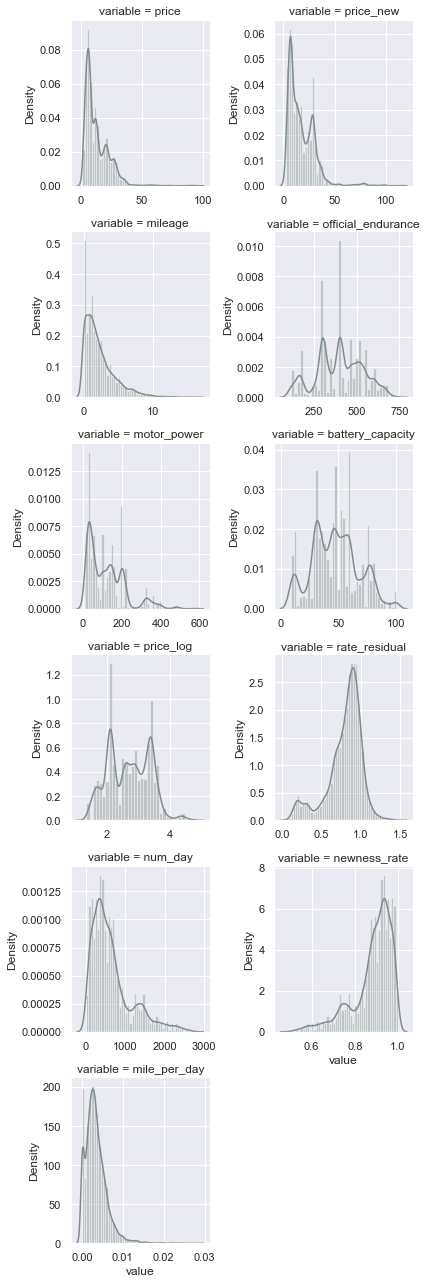

In [78]:
### 3) 每个数字特征得分布可视化
#电车
f = pd.melt(df_e, value_vars=numeric_features_e)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value",color='#7f8c8d')

可以看出与油车相比，活跃在二手市场的电车新车价格明显低于油车，大概10w左右，另外电车的里程也比油车明显要低，另外电车的official_endurance相比油车的排量分布更均匀，rate_residual大部分分布在1附近明显高于汽车，可见电车在二手市场更好流通，大部分电车二手车使用天数小于1000天，对于newness_rate大部分分布在0.8到1。而mile_per_day高于汽车的mile_per_day.

In [79]:
### 3) 每个数字特征得分布可视化
#混合车
numeric_features_m= ['price','price_new','mileage','official_endurance','motor_power','battery_capacity','price_log','rate_residual','num_day','newness_rate','mile_per_day']

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users

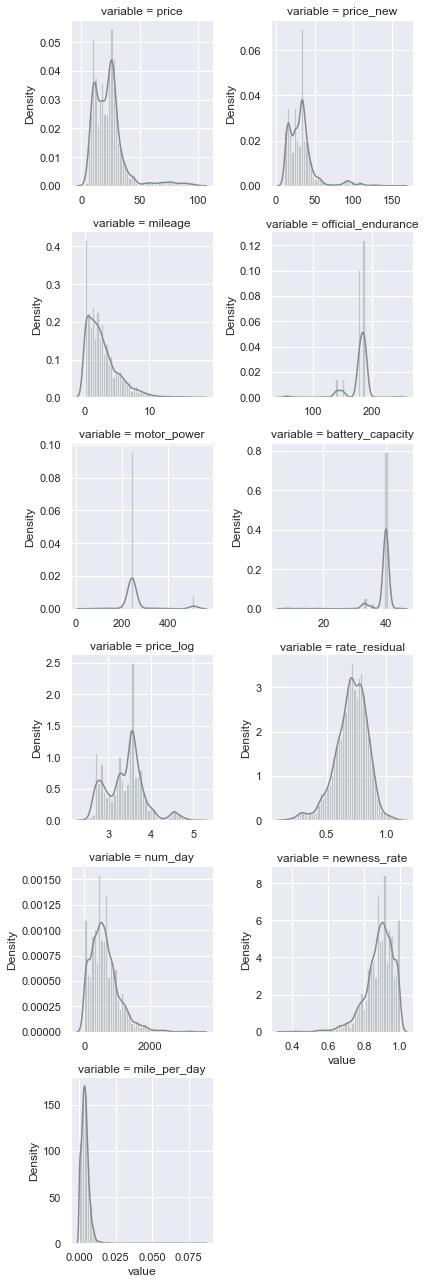

In [80]:
f = pd.melt(df_m, value_vars=numeric_features_m)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value",color='#7f8c8d')

混动price在市场上流通的二手车大部分是25w左右，price_new也比电车和油车高，mileage分布和电车相似，rate_residual大概在0.7左右，高于油车低于电车，使用天数大于电车小于油车，newness_rate和电车一样大部分分布在0.8到1，mile_per_day大于汽车小于电车。

总结：rate_residual电车最高，混动第二，油车最后。背后原因应该与使用天数有关，油车使用天数多于混动多于电车，从newness_rate值分布也可以看出这个规律，其值油车小于混动小于电车，意味着二手市场上的大部分汽车成新率低于混动和电车，也就是二手市场中的汽车偏旧，保值率偏低。总的来说，二手市场中的电车相比油车和混动原价要低，二手价也更低，但保值率更高。

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


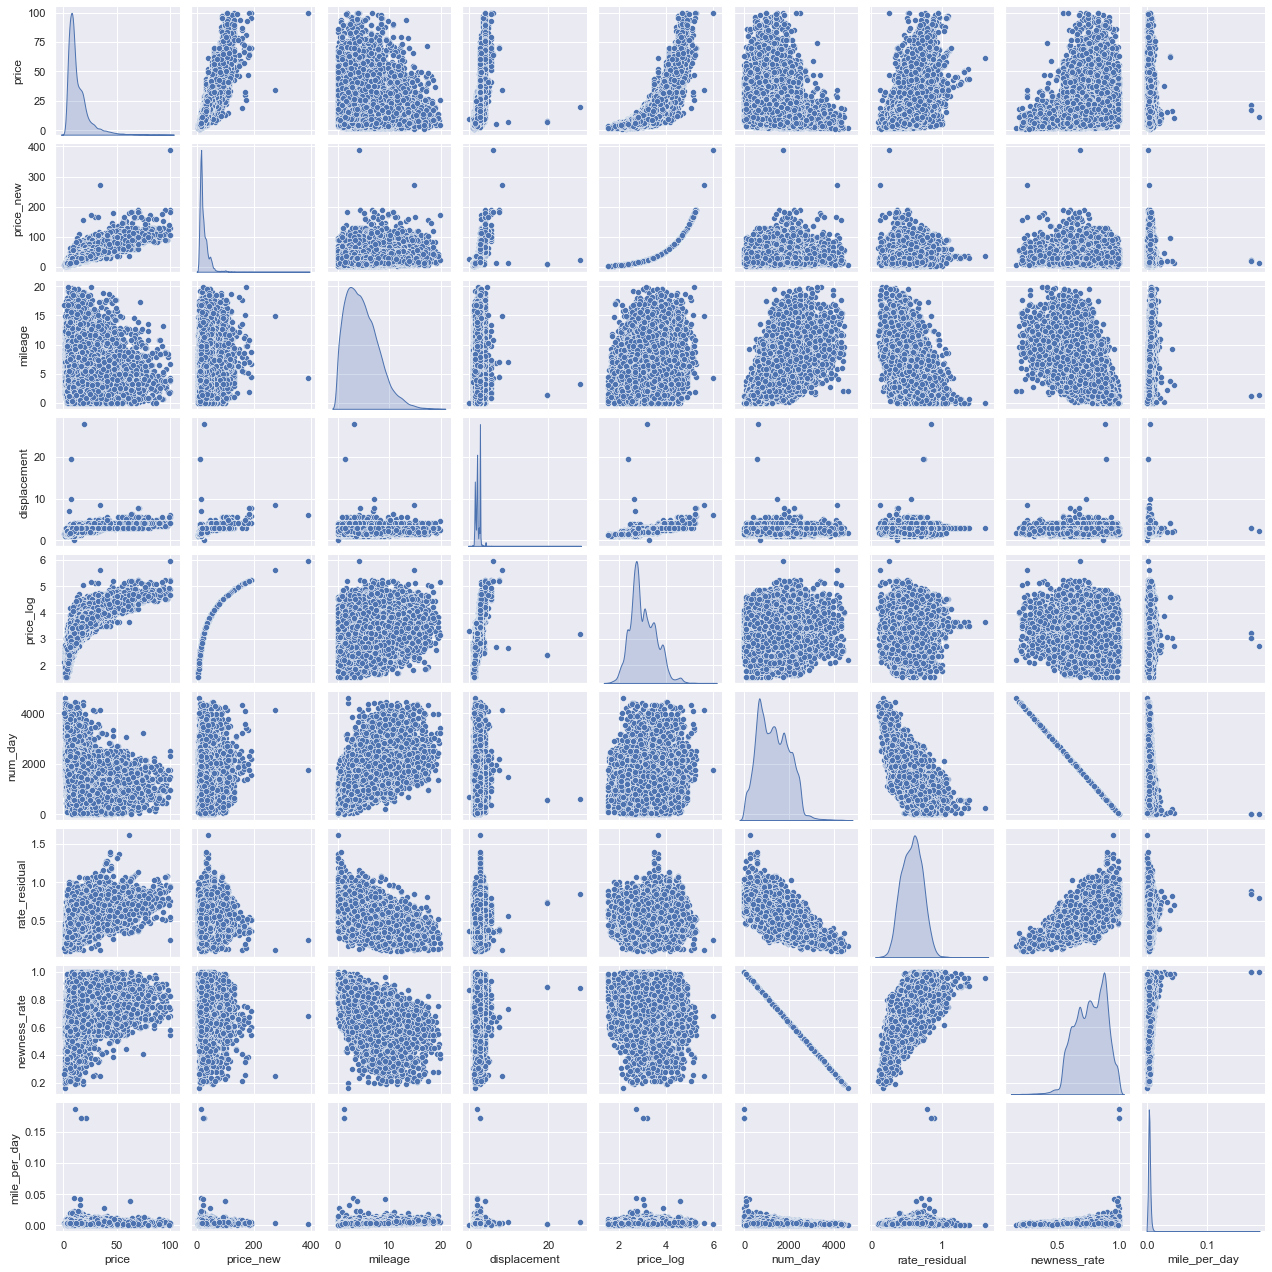

In [81]:
## 4) 数字特征相互之间的关系可视化
#汽车
sns.set()
columns_p= ['price','price_new','mileage','displacement','price_log','num_day','rate_residual','newness_rate','mile_per_day']
sns.pairplot(df_p[columns_p],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

分析与前方热力图一样，结合热力图数值一起描述。

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


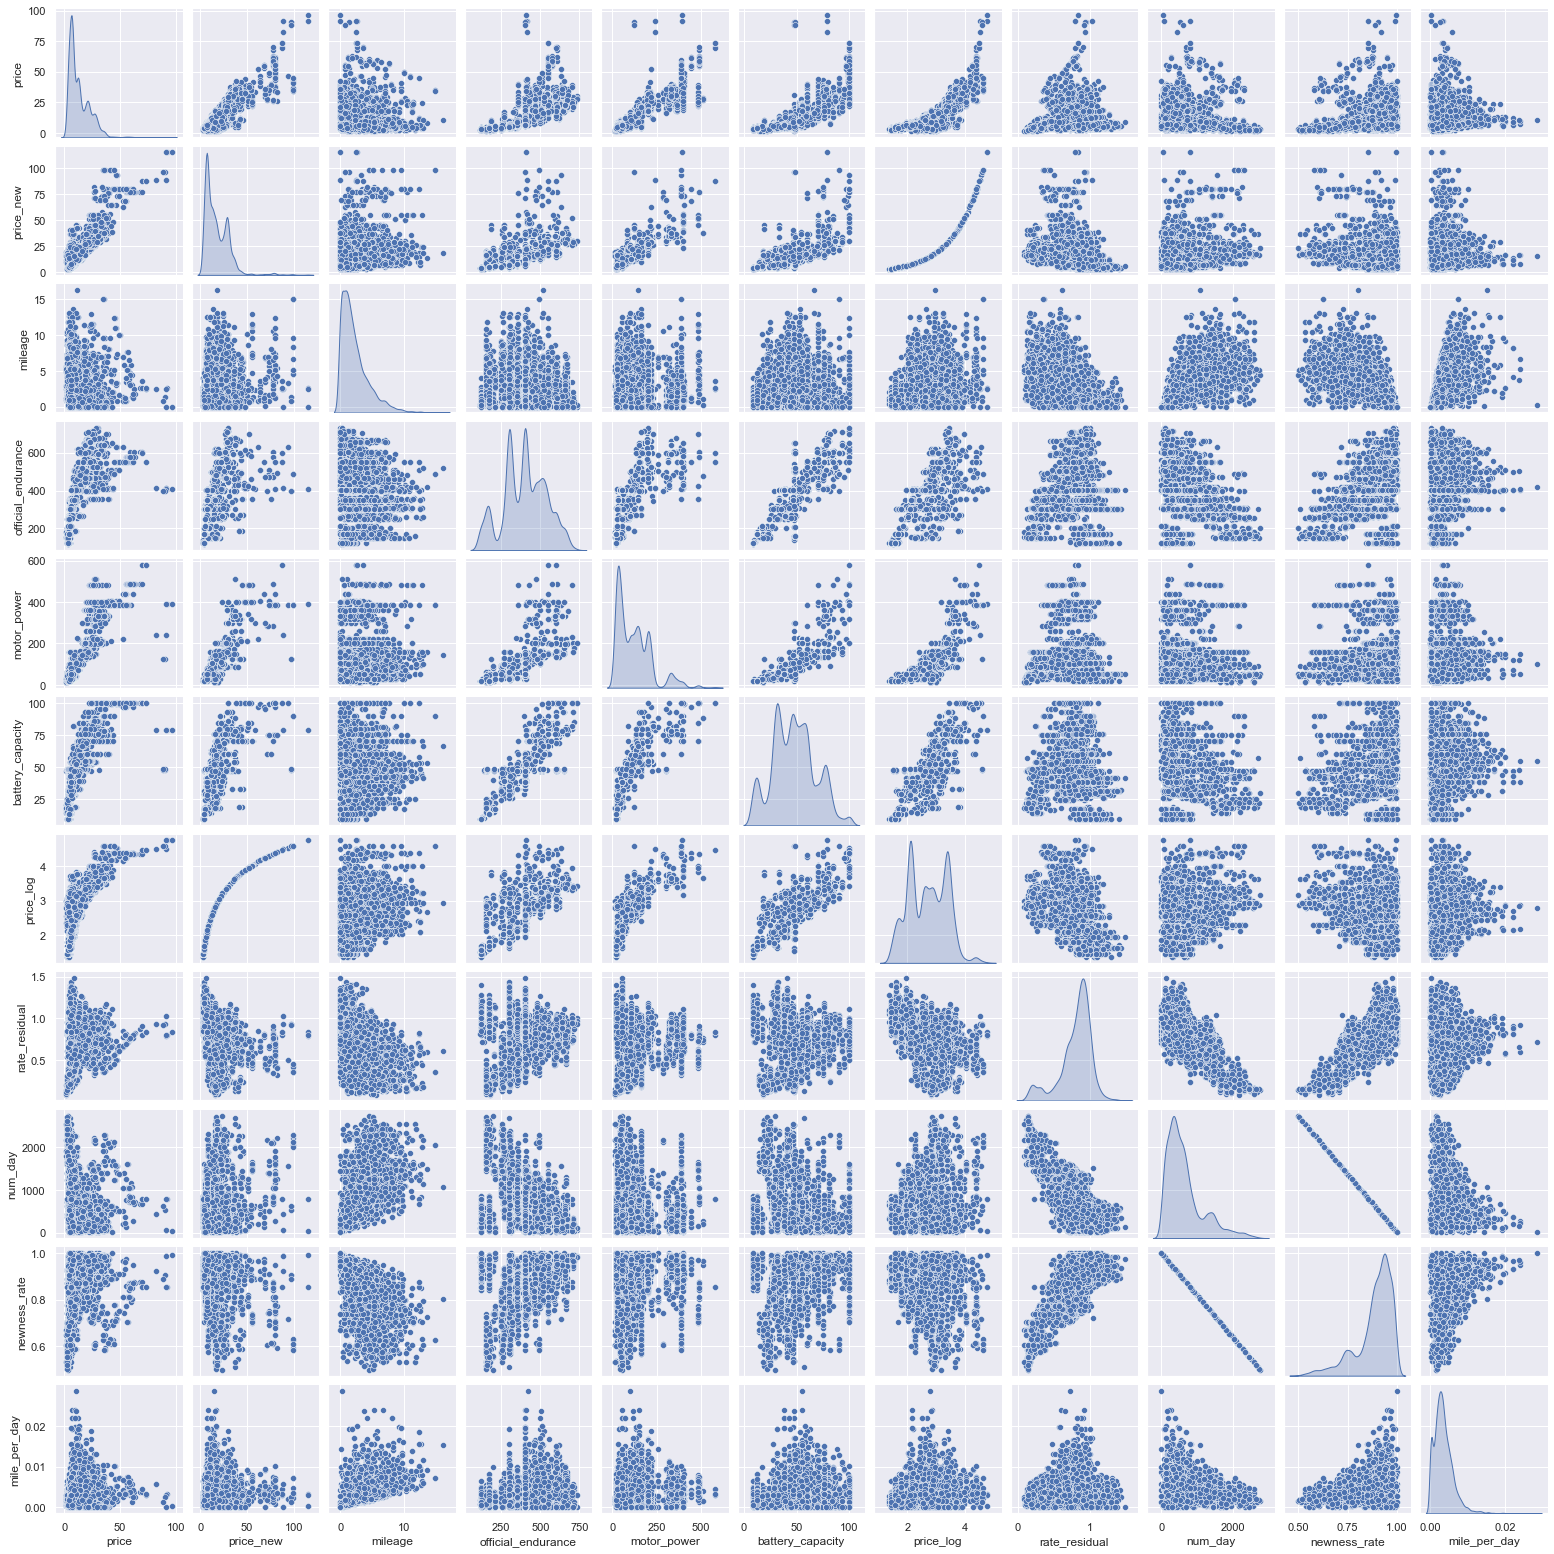

In [82]:
## 4) 数字特征相互之间的关系可视化
#电车
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei'] #绘图显示中文

sns.set()
columns_e= ['price','price_new','mileage','official_endurance','motor_power','battery_capacity','price_log','rate_residual','num_day','newness_rate','mile_per_day']
sns.pairplot(df_e[columns_e],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()


分析与前方热力图一样，结合热力图数值一起描述。

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


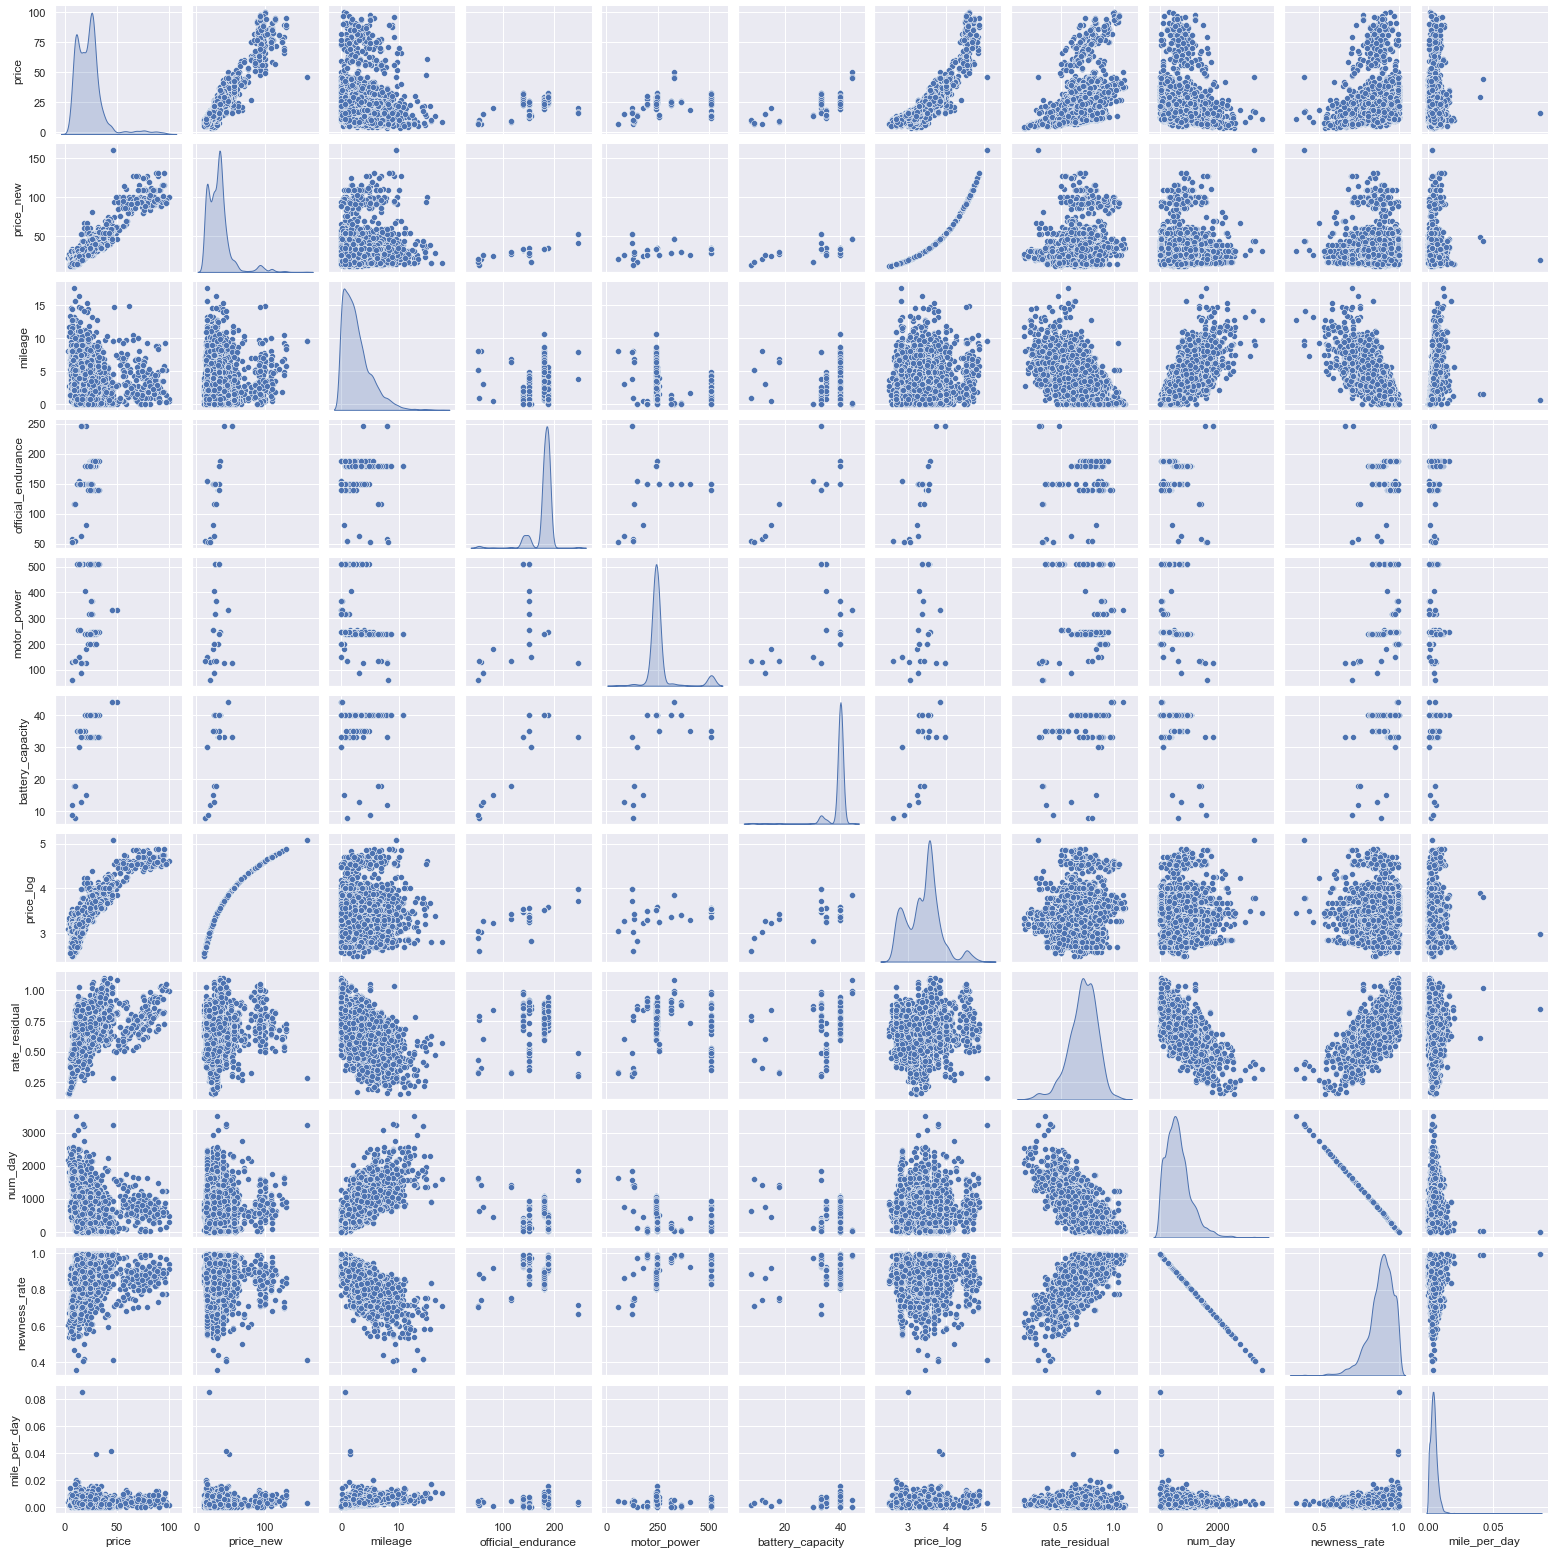

In [83]:
## 4) 数字特征相互之间的关系可视化
#混合车
sns.set()
columns_m= ['price','price_new','mileage','official_endurance','motor_power','battery_capacity','price_log','rate_residual','num_day','newness_rate','mile_per_day']
sns.pairplot(df_m[columns_m],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

分析与前方热力图一样，结合热力图数值一起描述。

In [84]:
categorical_features = ['standard','gearbox','num_trans','license_location','color','keys','city']

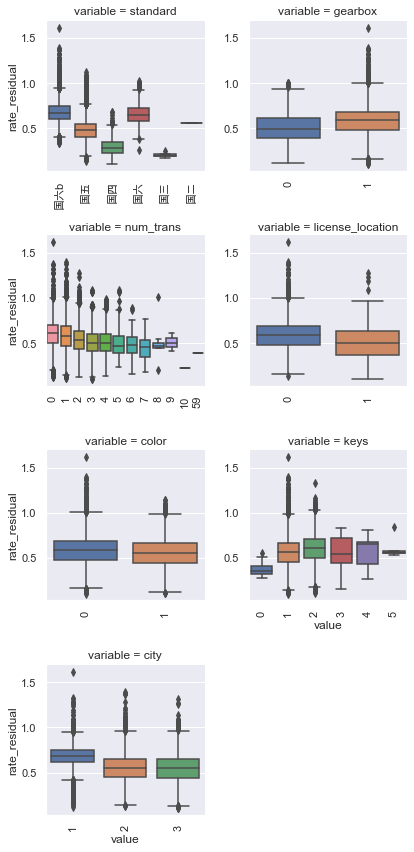

In [85]:
## 2) 类别特征箱形图可视化
#汽车
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    x=plt.xticks(rotation=90)

f = pd.melt(df_p, id_vars=['rate_residual'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(boxplot, "value", "rate_residual",color=colors)

可以看出汽车二手车中大部分国六b的rate_residual比较大，（红色箱子）的rate_residual与其差不多，两种gearbox差别较小，num_trans可以看出比较小的负相关，除了北上广深的其他城市的二手车rate_residual比北上广深高一些，4把钥匙的二手车rate_residual更高，北京的二手车平台上的二手车相比上海深圳rate_residual更高。

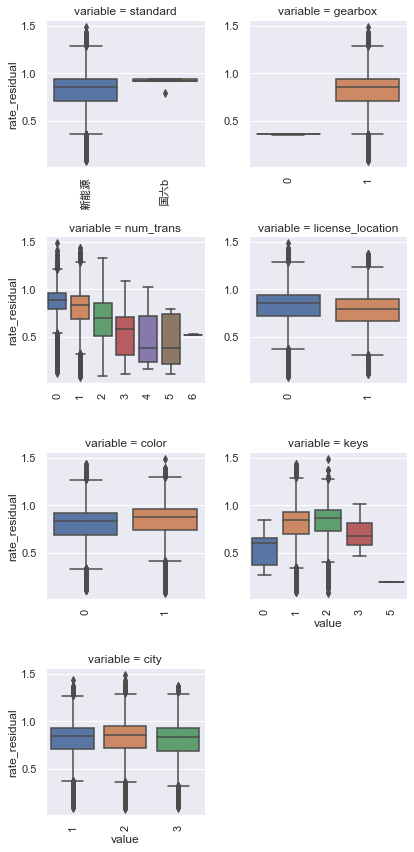

In [86]:
## 2) 类别特征箱形图可视化
#电车
f = pd.melt(df_e, id_vars=['rate_residual'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(boxplot, "value", "rate_residual")

可以看出大部分电车为（蓝色箱子）的rate_residual比较大，电车gearbox为1数量较多，num_trans可以看出比较大的负相关，除了北上广深的其他城市的二手车rate_residual比北上广深高一些，2把钥匙的二手车rate_residual更高，深圳的二手车平台上的二手车相比上海北京rate_residual更高。

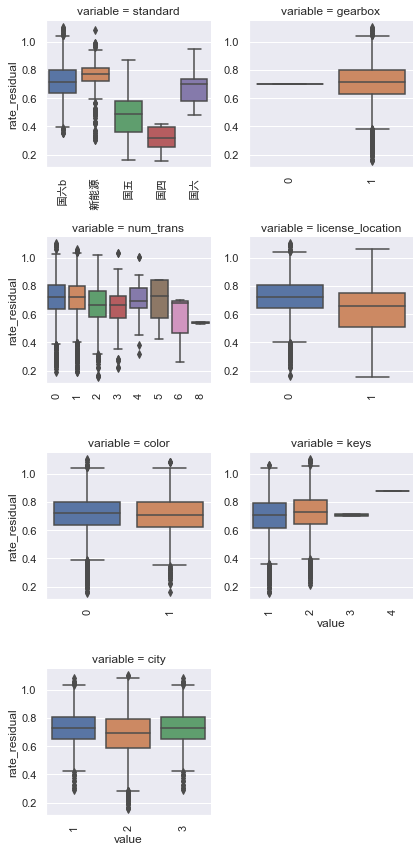

In [87]:
## 2) 类别特征箱形图可视化
#混动

f = pd.melt(df_m, id_vars=['rate_residual'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(boxplot, "value", "rate_residual",color='deepskyblue')


混动车自动挡偏多，与num_trans无明显线性关系，除北上广深的其他城市的二手车rate_residual比北上广深高，混动车gearbox为1数量较多，两类别color对混动rate_residual几乎持平。

总结：类别型特征对各类型二手车影响不大，与num_trans有负相关性，除北上广深的其他城市的二手车rate_residual比北上广深高，不同color对rate_residual只有比较小的影响。

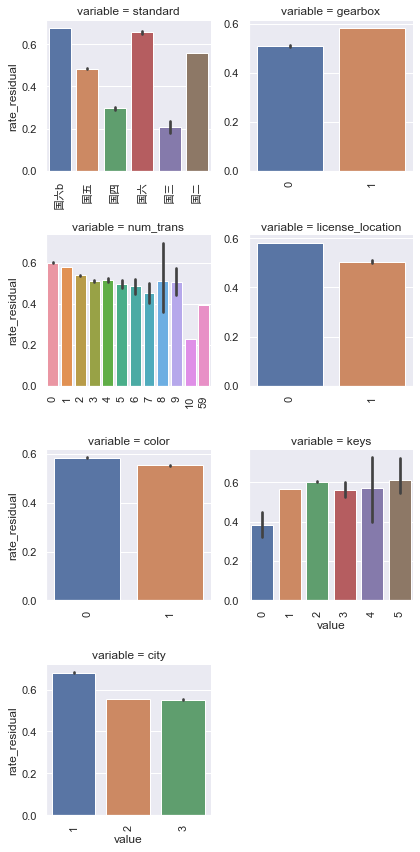

In [88]:
## 4) 类别特征的柱形图可视化
#汽车
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    x=plt.xticks(rotation=90)
f = pd.melt(df_p, id_vars=['rate_residual'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(bar_plot, "value", "rate_residual",colors=colors)


与箱形图一致，一起描述

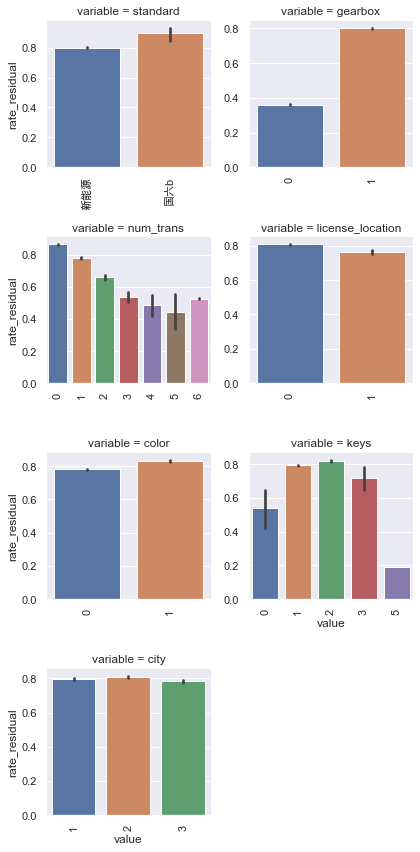

In [89]:
## 4) 类别特征的柱形图可视化
#电车

f = pd.melt(df_e, id_vars=['rate_residual'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(bar_plot, "value", "rate_residual")


与箱形图一致，一起描述

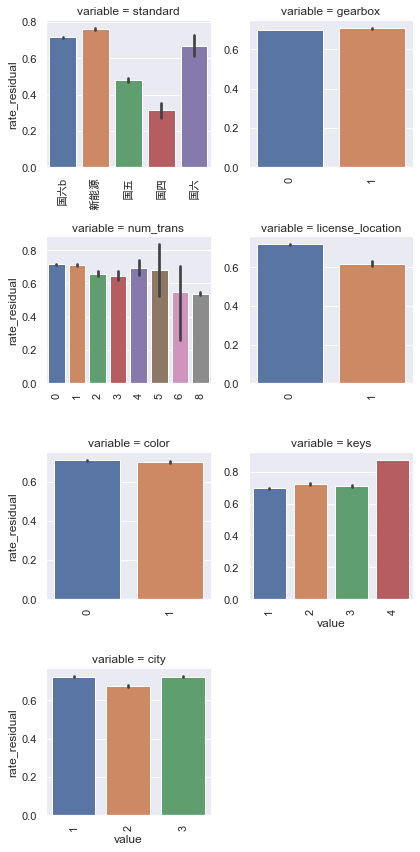

In [90]:
## 4) 类别特征的柱形图可视化
#混动
f = pd.melt(df_m, id_vars=['rate_residual'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(bar_plot, "value", "rate_residual")

与箱形图一致，一起描述